In [4]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 11s 1us/step


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
x_train.shape

(60000, 28, 28)

Now we will scale the values to a value between 0 to 1 by dividing the pixels by the range which is 255

In [9]:
x_train = x_train/255
x_test = x_test/255

Here let's see how one digit actually looks like with the matplot's matrix show function

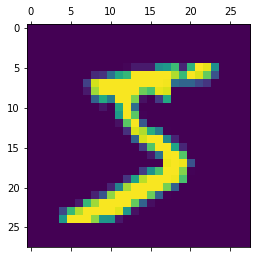

In [11]:
plt.matshow(x_train[0])

In [12]:
y_train[0]

5

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [31]:
model = Sequential()

#the input layer
model.add(Flatten(input_shape=[28,28]))

#now we add the hidden layer
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                39250     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [62]:
history = model.fit(x_train,y_train,epochs=5,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 91us/step - loss: 0.0911 - acc: 0.9709 - val_loss: 0.0429 - val_acc: 0.9864
Epoch 2/5
48000/48000 [==============================] - 5s 98us/step - loss: 0.0881 - acc: 0.9706 - val_loss: 0.0493 - val_acc: 0.9853
Epoch 3/5
48000/48000 [==============================] - 4s 92us/step - loss: 0.0858 - acc: 0.9719 - val_loss: 0.0496 - val_acc: 0.9836
Epoch 4/5
48000/48000 [==============================] - 4s 74us/step - loss: 0.0818 - acc: 0.9722 - val_loss: 0.0537 - val_acc: 0.9831
Epoch 5/5
48000/48000 [==============================] - 4s 91us/step - loss: 0.0845 - acc: 0.9720 - val_loss: 0.0540 - val_acc: 0.9832


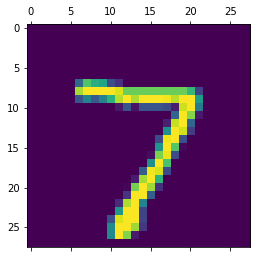

In [63]:
plt.matshow(x_test[0])

In [64]:
y_pred=model.predict(x_test)

In [65]:
y_pred[0]

array([1.4844952e-08, 9.0274245e-13, 3.1575695e-09, 1.5215758e-04,
       4.5758854e-18, 3.6768672e-08, 3.8062283e-13, 9.9984384e-01,
       3.9644156e-06, 1.9177882e-08], dtype=float32)

In [66]:
np.argmax(y_pred[0])

7

Here we show that the predicted value based on our model is 7

In [67]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 39us/step


[0.09854479090736713, 0.9729]

low loss value and high accuracy

## These are the metrics for the 5 epochs which we have ran and are values which we can access

In [68]:
history.history

{'val_loss': [0.04291538766251567,
  0.04928902661963366,
  0.049593854613718576,
  0.05366388658620417,
  0.0539855658885014],
 'val_acc': [0.9864166666666667,
  0.9853333333333333,
  0.9835833333333334,
  0.9830833333333333,
  0.9831666666666666],
 'loss': [0.09112911212366695,
  0.08810576156231885,
  0.08578906135447323,
  0.08177855490761188,
  0.0844563606089602],
 'acc': [0.9709166666666667,
  0.9705833333333334,
  0.9718541666666667,
  0.9722083333333333,
  0.9720416666666667]}

In [69]:
history.epoch

[0, 1, 2, 3, 4]

In [70]:
history.history['loss']

[0.09112911212366695,
 0.08810576156231885,
 0.08578906135447323,
 0.08177855490761188,
 0.0844563606089602]

this is the validation loss as compared to training loss

In [71]:
history.history['val_loss']

[0.04291538766251567,
 0.04928902661963366,
 0.049593854613718576,
 0.05366388658620417,
 0.0539855658885014]

In [72]:
history.history['acc']

[0.9709166666666667,
 0.9705833333333334,
 0.9718541666666667,
 0.9722083333333333,
 0.9720416666666667]

Similarly, this is the validation accuracy as compared to the training data

In [73]:
history.history['val_acc']

[0.9864166666666667,
 0.9853333333333333,
 0.9835833333333334,
 0.9830833333333333,
 0.9831666666666666]

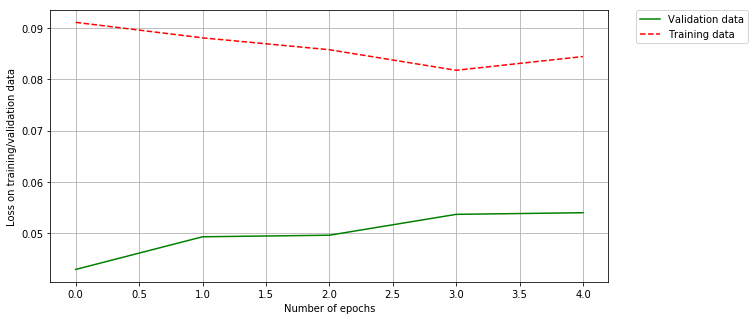

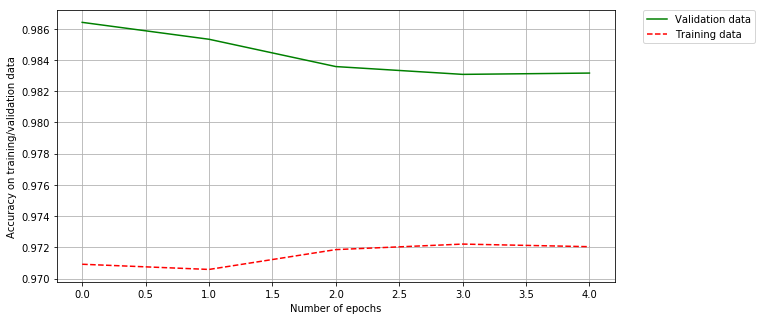

In [74]:
# Plot loss and accuracy 
fig = plt.figure(figsize=(10,5))

#plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['val_loss'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['loss'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Loss on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#plt.subplot(1, 2, 2)
fig = plt.figure(figsize=(10,5))
plt.plot(history.epoch, history.history['val_acc'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['acc'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()